In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangluru-house-dataset/cleaned_data.csv
/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv


**Import libraries to explore dataset**

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

**Load datasets**

In [3]:
dataset = pd.read_csv("/kaggle/input/bangluru-house-dataset/bengaluru_house_prices.csv")
dataset.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


**Explore dataset**

In [4]:
dataset.shape

(13320, 9)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


**Statistical Anaylsis**

In [6]:
dataset.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# * **Data Preprocessing**

* **Remove irrelevant columns**

In [7]:
dataset = dataset.drop(['area_type', 'availability','society'], axis = 'columns')
dataset.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


* **Check missing values**

In [8]:
dataset.isnull().any()

location       True
size           True
total_sqft    False
bath           True
balcony        True
price         False
dtype: bool

In [9]:
dataset.isnull().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [10]:
dataset = dataset.dropna()


In [11]:
dataset.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
balcony       0
price         0
dtype: int64

In [12]:
dataset['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '3 Bedroom', '1 BHK', '1 RK',
       '4 BHK', '1 Bedroom', '2 Bedroom', '6 Bedroom', '8 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '11 Bedroom', '43 Bedroom',
       '14 BHK', '8 BHK', '12 Bedroom', '10 Bedroom', '13 BHK'],
      dtype=object)

**Creating new column with name BHK**

In [13]:
dataset['BHK'] = dataset['size'].apply(lambda x: int(x.split(' ')[0]))
dataset.head()

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [14]:
dataset['BHK'].unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13])

In [15]:
dataset[dataset.BHK>10]

,location,size,total_sqft,bath,balcony,price,BHK
459,1 Giri Nagar,11 BHK,5000,9.0,3.0,360.0,11
1718,2Electronic City Phase II,27 BHK,8000,27.0,0.0,230.0,27
1768,1 Ramamurthy Nagar,11 Bedroom,1200,11.0,0.0,170.0,11
3853,1 Annasandrapalya,11 Bedroom,1200,6.0,3.0,150.0,11
4684,Munnekollal,43 Bedroom,2400,40.0,0.0,660.0,43
4916,1Channasandra,14 BHK,1250,15.0,0.0,125.0,14
6533,Mysore Road,12 Bedroom,2232,6.0,2.0,300.0,12
9935,1Hoysalanagar,13 BHK,5425,13.0,0.0,275.0,13


In [16]:
dataset['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

**Let's change range values to single value**

**first write function to check values are float or not**

In [17]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [18]:
dataset[~dataset['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,balcony,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,0.0,56.800,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,0.0,59.135,2


**write a function that take the avarge of given range**

In [19]:
# Define the function to convert range values to average with error handling
def range_to_num(x):
    try:
        tok = x.split('-')
        if len(tok) == 2:
            return (float(tok[0]) + float(tok[1])) / 2
        return float(x)
    except Exception as e:
#         print(f"Error converting '{x}': {e}")
        return None

In [20]:
# Apply the function to the total_sqft column
dataset['total_sqft'] = dataset['total_sqft'].apply(range_to_num)

In [21]:
dataset.head(10)

,location,size,total_sqft,bath,balcony,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,2
8,Marathahalli,3 BHK,1310.0,3.0,1.0,63.25,3
10,Whitefield,3 BHK,1800.0,2.0,2.0,70.00,3
11,Whitefield,4 Bedroom,2785.0,5.0,3.0,295.00,4
12,7th Phase JP Nagar,2 BHK,1000.0,2.0,1.0,38.00,2


In [22]:
dataset.loc[122]

location      Hebbal
size           4 BHK
total_sqft    5611.5
bath             4.0
balcony          0.0
price          477.0
BHK                4
Name: 122, dtype: object

In [23]:
dataset['price_per_sqft'] = dataset['price']*100000/dataset['total_sqft']
dataset.head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,2,4250.000000


**Outlier Removal**

In [24]:
dataset[dataset.total_sqft/dataset.BHK<300].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
58,Murugeshpalya,6 Bedroom,1407.0,4.0,1.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,0.0,85.0,8,6296.296296
70,Double Road,3 Bedroom,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,3.0,160.0,6,22535.211268


In [25]:
dataset.shape

(12710, 8)

In [26]:
dataset = dataset[~(dataset.total_sqft/dataset.BHK<300)]
dataset.shape

(12055, 8)

In [27]:
dataset.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

*Here we find that min price per sqft is 267 rs/sqft whereas max is 12000000, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation*

In [28]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
dataset = remove_pps_outliers(dataset)
dataset.shape

(8904, 8)

*Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like*

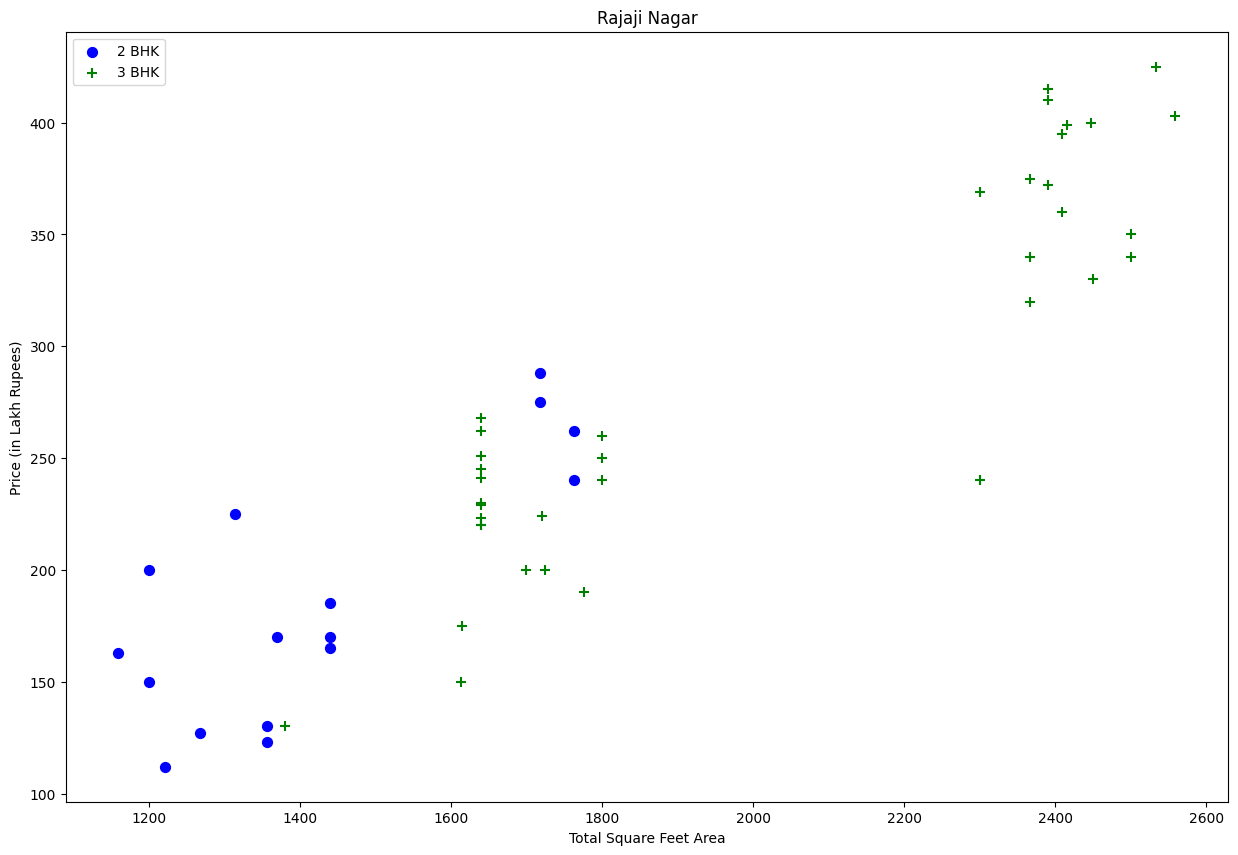

In [29]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
def plot_scatter_chart(df,location):
    bhk2 = dataset[(dataset.location==location) & (dataset.BHK==2)]
    bhk3 = dataset[(dataset.location==location) & (dataset.BHK==3)]
    matplotlib.rcParams['figure.figsize'] = (15,10)
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (in Lakh Rupees)")
    plt.title(location)
    plt.legend()
    
plot_scatter_chart(dataset,"Rajaji Nagar")

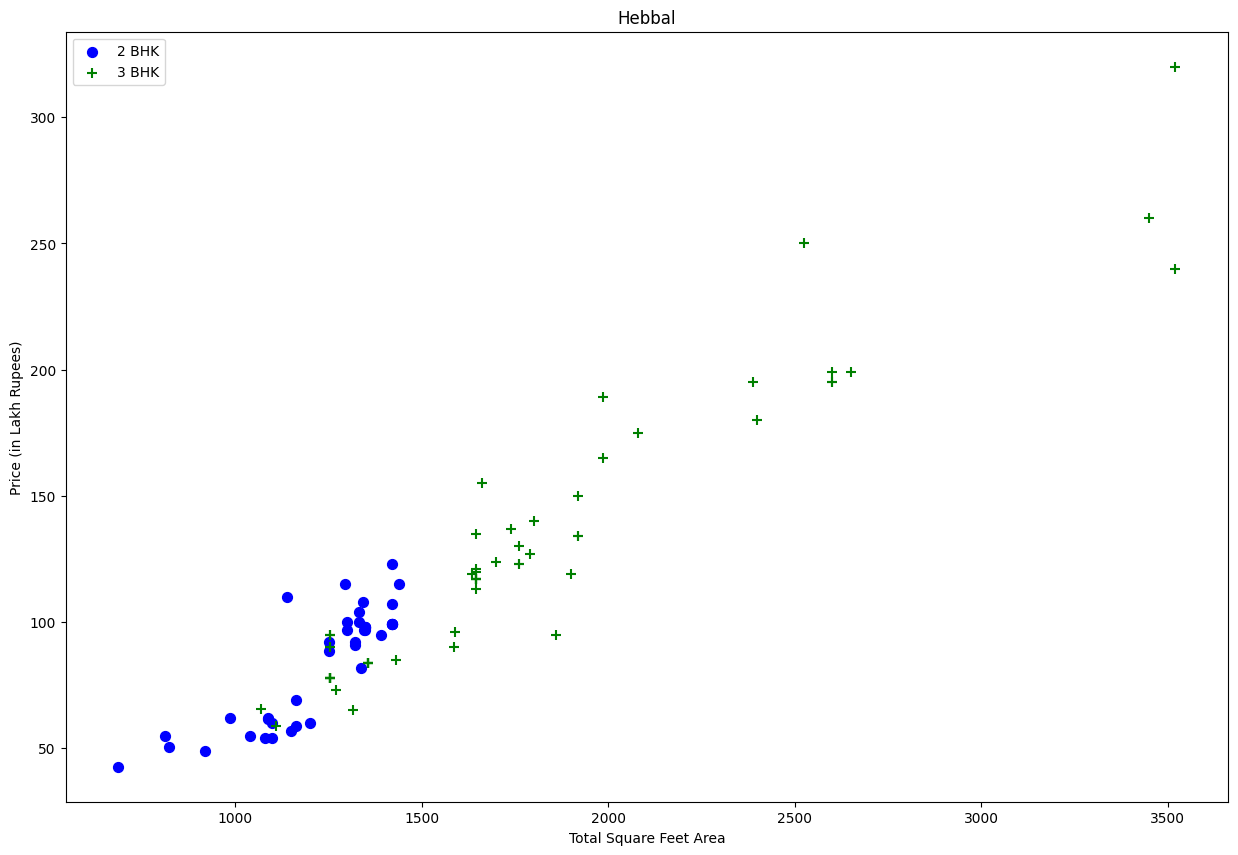

In [30]:
plot_scatter_chart(dataset,"Hebbal")

**We should also remove properties where for same location, the price of (for example) 3 bedroom apartment is less than 2 bedroom apartment (with same square ft area). What we will do is for a given location, we will build a dictionary of stats per bhk, i.e.**

*{
    '1' : {
        'mean': 4000,
        'std: 2000,
        'count': 34
    },
    '2' : {
        'mean': 4300,
        'std: 2300,
        'count': 22
    },    
}*

**Now we can remove those 2 BHK apartments whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartment**

In [31]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')
dataset = remove_bhk_outliers(dataset)
dataset.shape

(7203, 8)

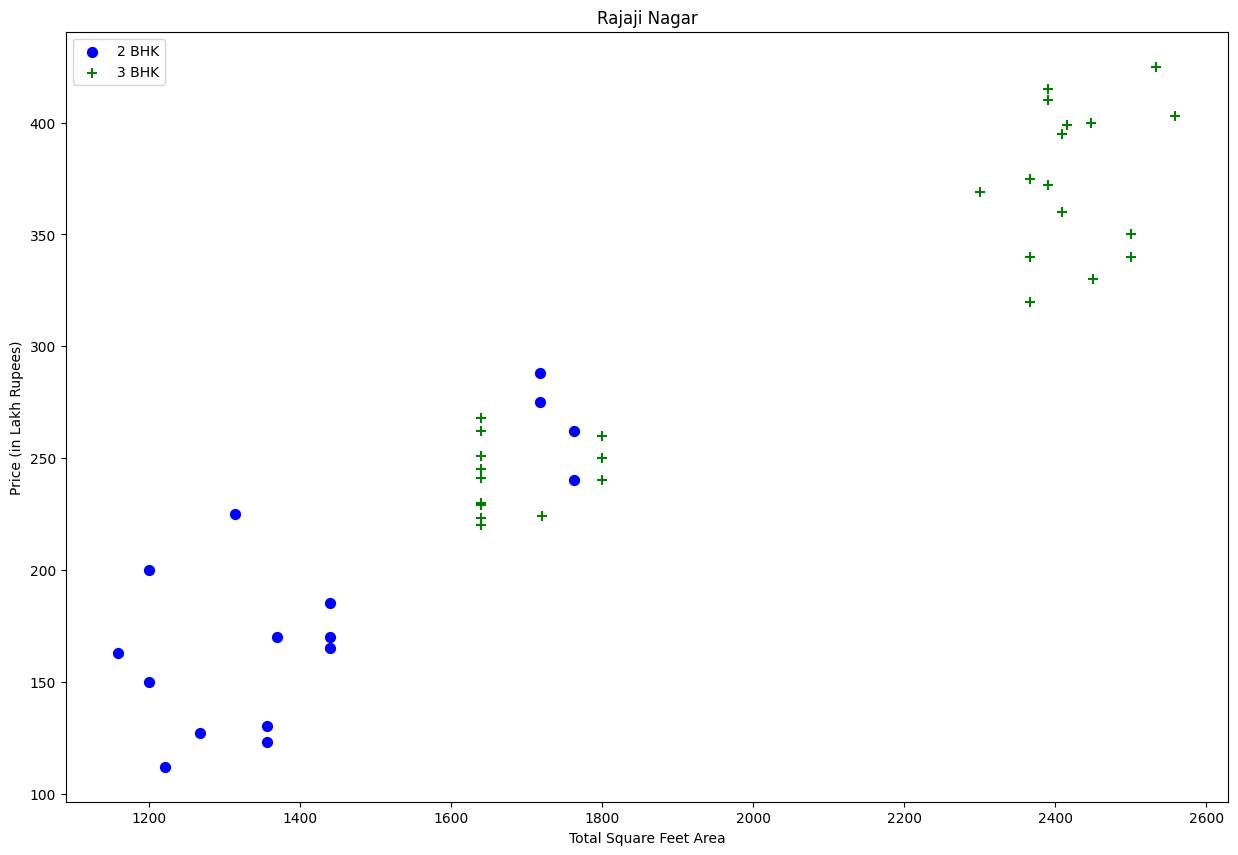

In [32]:
plot_scatter_chart(dataset,"Rajaji Nagar")

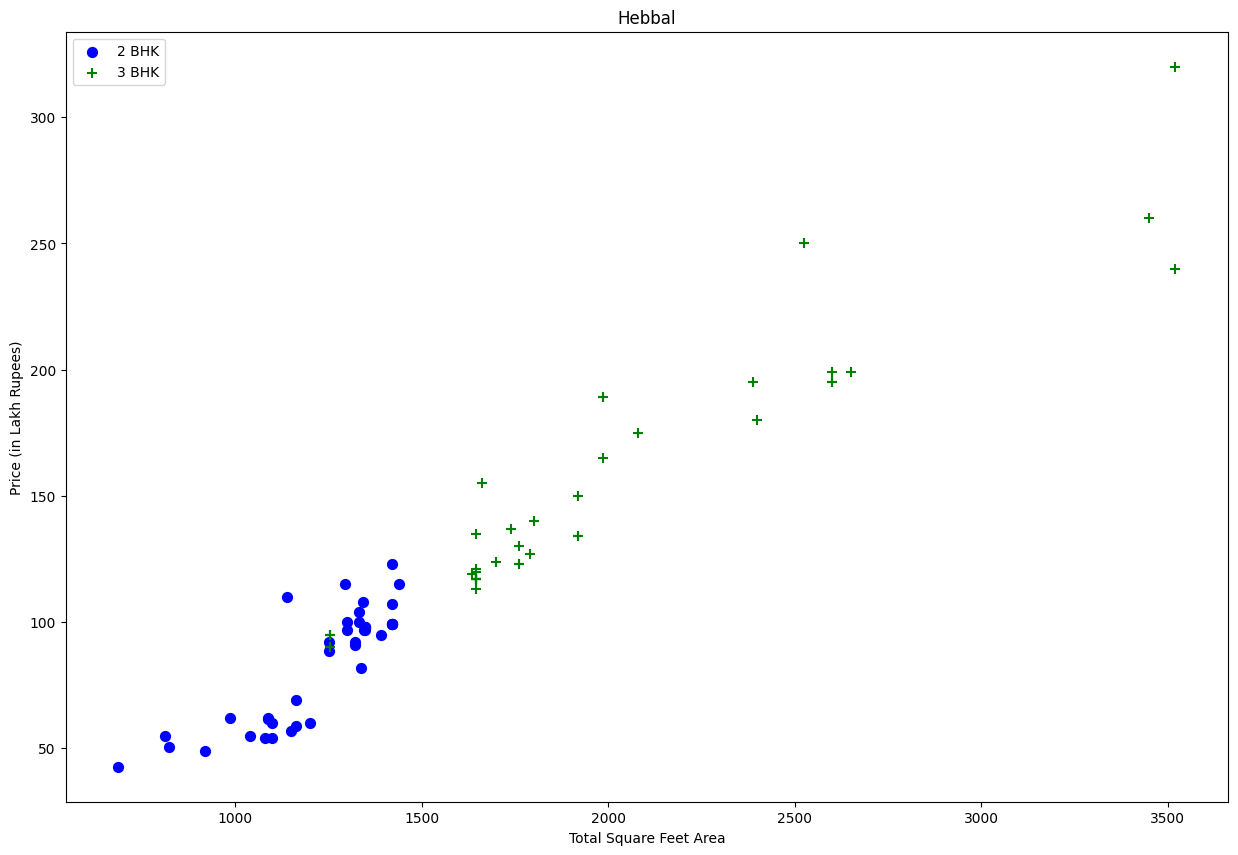

In [33]:
plot_scatter_chart(dataset,"Hebbal")

Text(0, 0.5, 'Count')

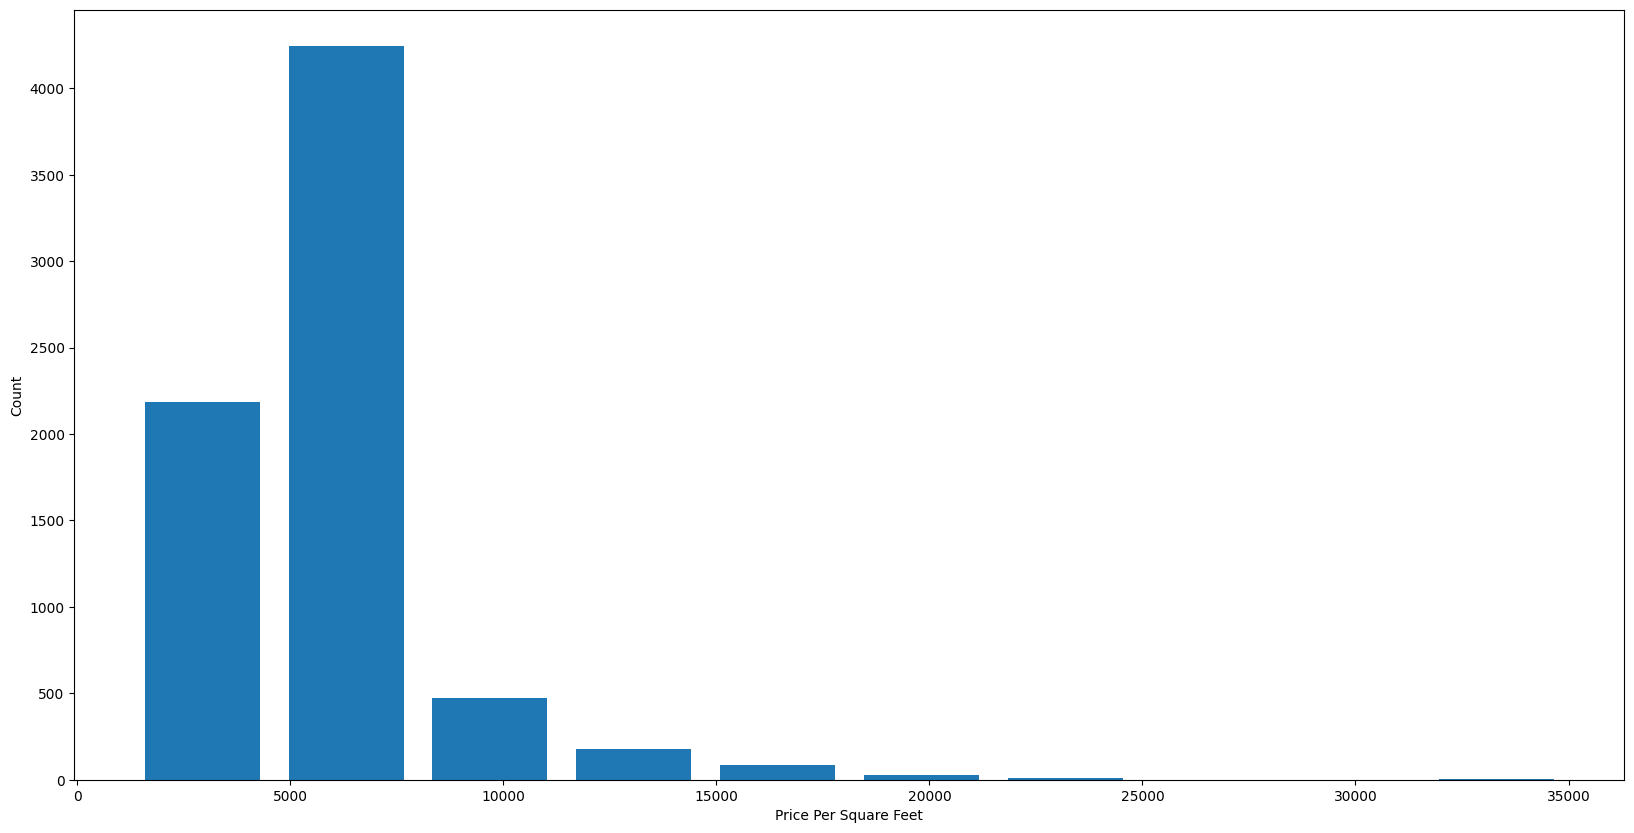

In [34]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,10)
plt.hist(dataset.price_per_sqft,rwidth=0.8)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [35]:
dataset.bath.unique()

array([3., 2., 1., 4., 5., 8., 6., 7., 9.])

Text(0, 0.5, 'Count')

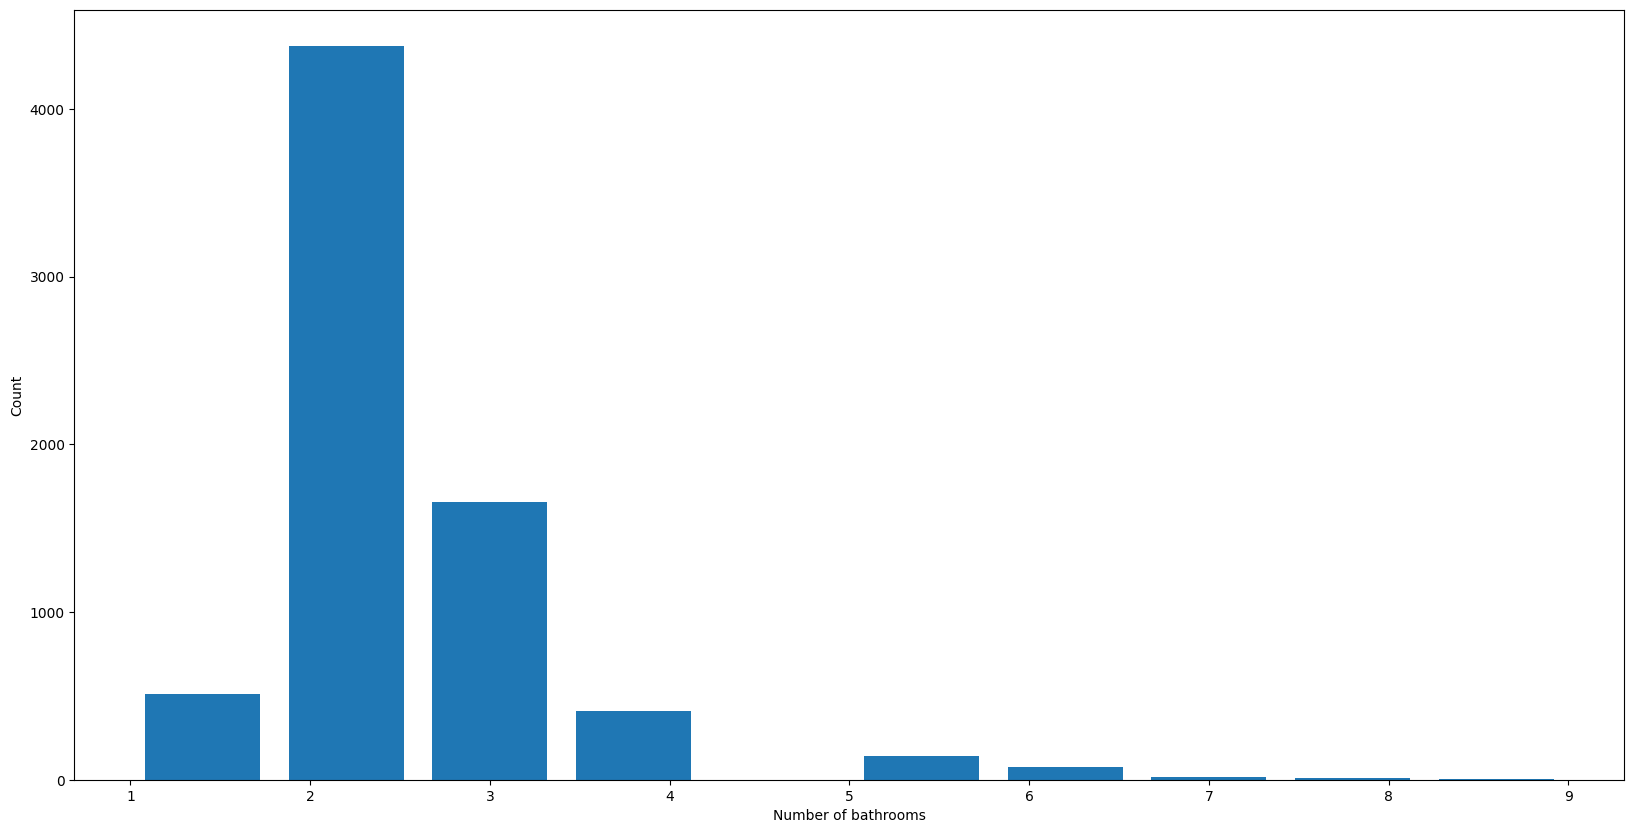

In [36]:
plt.hist(dataset.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

In [37]:
dataset[dataset.bath>dataset.BHK+2]

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
1878,Chikkabanavar,4 Bedroom,2460.0,7.0,2.0,80.0,4,3252.032520
7120,Sathya Sai Layout,6 BHK,11338.0,9.0,1.0,1000.0,6,8819.897689
7589,Thanisandra,3 BHK,1806.0,6.0,2.0,116.0,3,6423.034330


**Again the business manager has a conversation with you (i.e. a data scientist) that if you have 4 bedroom home and even if you have bathroom in all 4 rooms plus one guest bathroom, you will have total bath = total bed + 1 max. Anything above that is an outlier or a data error and can be removed**

In [38]:
dataset[dataset.bath<dataset.BHK+2].head()

,location,size,total_sqft,bath,balcony,price,BHK,price_per_sqft
0,Devarabeesana Halli,3 BHK,1672.0,3.0,2.0,150.0,3,8971.291866
1,Devarabeesana Halli,3 BHK,1750.0,3.0,3.0,149.0,3,8514.285714
2,Devarabeesana Halli,3 BHK,1750.0,3.0,2.0,150.0,3,8571.428571
4,Devarachikkanahalli,2 BHK,1250.0,2.0,2.0,40.0,2,3200.000000
5,Devarachikkanahalli,2 Bedroom,1200.0,2.0,2.0,83.0,2,6916.666667


In [39]:
dataset = dataset.drop(['size','price_per_sqft'],axis='columns')
dataset.head(3)

,location,total_sqft,bath,balcony,price,BHK
0,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3
1,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3
2,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3


**Use One Hot Encoding For Location**

In [40]:
dummies = pd.get_dummies(dataset.location)
dummies.head(3)

,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,south,1st Block BEL Layout,1st Block HBR Layout,1st Block HRBR Layout,...,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,frazertown,manyata park,tc.palya
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [41]:
dataset = pd.concat([dataset,dummies],axis='columns')
dataset.head()

,location,total_sqft,bath,balcony,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,...,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,frazertown,manyata park,tc.palya
0,Devarabeesana Halli,1672.0,3.0,2.0,150.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarabeesana Halli,1750.0,3.0,3.0,149.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarabeesana Halli,1750.0,3.0,2.0,150.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
5,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [42]:
dataset = dataset.drop('location',axis='columns')


In [43]:
dataset.head()

,total_sqft,bath,balcony,price,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,...,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,frazertown,manyata park,tc.palya
0,1672.0,3.0,2.0,150.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1750.0,3.0,3.0,149.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1750.0,3.0,2.0,150.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1250.0,2.0,2.0,40.0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1200.0,2.0,2.0,83.0,2,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


**Build Model**

In [44]:
X = dataset.drop(['price'],axis='columns')
X.head(3)

,total_sqft,bath,balcony,BHK,Devarabeesana Halli,Devarachikkanahalli,Electronic City,Mysore Highway,Rachenahalli,Thanisandra,...,Yarandahalli,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yemlur,Yeshwanthpur,frazertown,manyata park,tc.palya
0,1672.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1750.0,3.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1750.0,3.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [45]:

y = dataset.price
y.head(3)

0    150.0
1    149.0
2    150.0
Name: price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [47]:
# from sklearn.linear_model import LinearRegression
# lr_clf = LinearRegression()
# lr_clf.fit(X_train,y_train)
# lr_clf.score(X_test,y_test)

In [48]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [49]:
# Linear Regression
lr_clf = LinearRegression()
lr_clf.fit(X_train, y_train)
lr_score = lr_clf.score(X_test, y_test)
lr_mse = mean_squared_error(y_test, lr_clf.predict(X_test))

In [50]:
# Lasso Regression
lasso_clf = Lasso()
lasso_clf.fit(X_train, y_train)
lasso_score = lasso_clf.score(X_test, y_test)
lasso_mse = mean_squared_error(y_test, lasso_clf.predict(X_test))


In [51]:
# Decision Tree Regressor
tree_clf = DecisionTreeRegressor()
tree_clf.fit(X_train, y_train)
tree_score = tree_clf.score(X_test, y_test)
tree_mse = mean_squared_error(y_test, tree_clf.predict(X_test))

In [52]:
# Random Forest Regressor
rf_clf = RandomForestRegressor()
rf_clf.fit(X_train, y_train)
rf_score = rf_clf.score(X_test, y_test)
rf_mse = mean_squared_error(y_test, rf_clf.predict(X_test))

In [53]:
# Support Vector Regressor
svr_clf = SVR()
svr_clf.fit(X_train, y_train)
svr_score = svr_clf.score(X_test, y_test)
svr_mse = mean_squared_error(y_test, svr_clf.predict(X_test))

In [54]:
# Printing the scores and mean squared errors
print(f"Linear Regression - Score: {lr_score}, MSE: {lr_mse}")
print(f"Lasso Regression - Score: {lasso_score}, MSE: {lasso_mse}")
print(f"Decision Tree Regressor - Score: {tree_score}, MSE: {tree_mse}")
print(f"Random Forest Regressor - Score: {rf_score}, MSE: {rf_mse}")
print(f"Support Vector Regressor - Score: {svr_score}, MSE: {svr_mse}")

Linear Regression - Score: 0.801092423009407, MSE: 2370.8396202156086
Lasso Regression - Score: 0.6388031215199886, MSE: 4305.214930244275
Decision Tree Regressor - Score: 0.4441281170236029, MSE: 6625.6052376859625
Random Forest Regressor - Score: 0.669730459395768, MSE: 3936.5826282824423
Support Vector Regressor - Score: 0.348451861918306, MSE: 7765.999483844928
